In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
r = 1
mean = [15, 5]
cov = [[1,r], [r,1]]
x, y = x, y = np.random.multivariate_normal(mean, cov, 400).T 

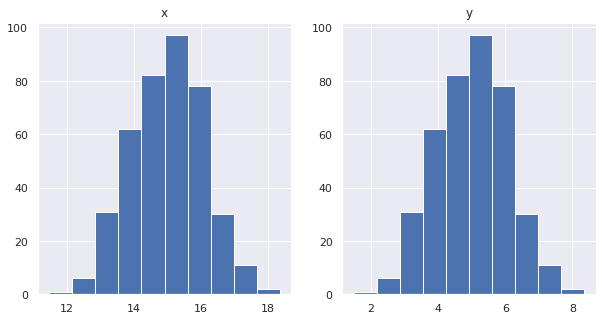

In [3]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(x=x, bins=10) #bins numero de barras 
plt.title("x")
plt.subplot(1, 2, 2) # 1 renglon 2 columnas 2 posición
plt.hist( x=y,
       bins = 10)
plt.title("y")
plt.show()

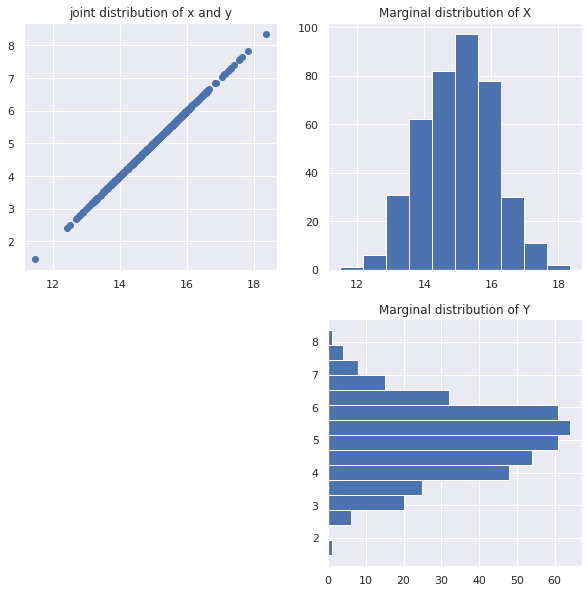

In [4]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(x=x,
           y=y)
plt.title("joint distribution of x and y")
plt.subplot(2,2,2)
plt.hist(x=x,
       bins = 10)
plt.title("Marginal distribution of X")

plt.subplot(2,2,4)
plt.hist(x=y,
        orientation="horizontal",
        bins=15)
plt.title("Marginal distribution of Y")

plt.show()

In [5]:
import pandas as pd
pd.set_option("max_columns", None)#None todas las columnas
import re

In [6]:
df = pd.read_csv("datasets/pokemon.csv")

In [7]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


<function matplotlib.pyplot.show(*args, **kw)>

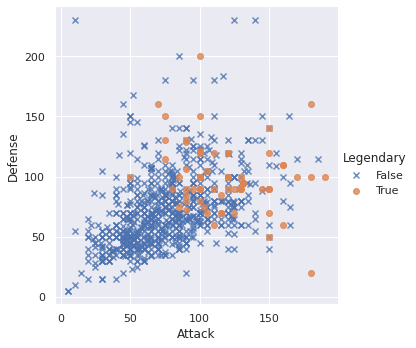

In [8]:
sns.lmplot(x="Attack",
          y="Defense",
          hue="Legendary",
          markers=["x", "o"],
          fit_reg =False,
          data=df
          )
plt.show

In [9]:
df = pd.read_csv("datasets/nhanes_2015_2016.csv")
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [10]:
keep_test = ["BMXWT","BMXHT","BMXBMI","BMXLEG","BMXARML","BMXARMC","BMXWAIST"] #extraer datos
keep_test

['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST']

In [11]:
col_names = df.columns
col_names

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [12]:
keep = [column for column in col_names if "BMX" in column]
keep

['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST']

In [13]:
df_BMX=df[keep]
df_BMX

,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST
0,94.8,184.5,27.8,43.3,43.6,35.9,101.1
1,90.4,171.4,30.8,38.0,40.0,33.2,107.9
2,83.4,170.1,28.8,35.6,37.0,31.0,116.5
3,109.8,160.9,42.4,38.5,37.7,38.3,110.1
4,55.2,164.9,20.3,37.4,36.0,27.2,80.4
...,...,...,...,...,...,...,...
5730,59.1,165.8,21.5,38.2,37.0,29.5,95.0
5731,112.1,182.2,33.8,43.4,41.8,42.3,110.2
5732,71.7,152.2,31.0,31.3,37.5,28.8,NaN
5733,78.2,173.3,26.0,40.3,37.5,30.6,98.9


In [14]:
df=pd.read_excel("datasets/Canada.xlsx",
                sheet_name = "Canada by Citizenship",
                skiprows = range(20),
                skipfooter = 2,
                engine = "openpyxl",
                )

In [15]:
df.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,741.0,828.0,1076.0,1028.0,1378.0,1170.0,713.0,858.0,1537.0,2212.0,2555.0,1999.0,2395.0,3326.0,4067.0,3697.0,3479.0,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,21.0,56.0,96.0,71.0,63.0,113.0,307.0,574.0,1264.0,1816.0,1602.0,1021.0,853.0,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.columns

Index([       'Type',    'Coverage',      'OdName',        'AREA',
          'AreaName',         'REG',     'RegName',         'DEV',
           'DevName',          1980,          1981,          1982,
                1983,          1984,          1985,          1986,
                1987,          1988,          1989,          1990,
                1991,          1992,          1993,          1994,
                1995,          1996,          1997,          1998,
                1999,          2000,          2001,          2002,
                2003,          2004,          2005,          2006,
                2007,          2008,          2009,          2010,
                2011,          2012,          2013, 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

In [17]:
df.drop( ["AREA", "REG", "DEV", "Type", "Coverage"],
        axis = 1,
        inplace = True)


In [18]:
df.rename(columns ={"OdName":"Country",
                   "AreaName": "Continent",
                   "RegName": "Region",
                   },
          inplace = True)

In [19]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,741.0,828.0,1076.0,1028.0,1378.0,1170.0,713.0,858.0,1537.0,2212.0,2555.0,1999.0,2395.0,3326.0,4067.0,3697.0,3479.0,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,21.0,56.0,96.0,71.0,63.0,113.0,307.0,574.0,1264.0,1816.0,1602.0,1021.0,853.0,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,69.0,132.0,242.0,434.0,491.0,872.0,795.0,717.0,595.0,1106.0,2054.0,1842.0,2292.0,2389.0,2867.0,3418.0,3406.0,3072.0,3616.0,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.set_index("Country", inplace = True)

In [21]:
df.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,741.0,828.0,1076.0,1028.0,1378.0,1170.0,713.0,858.0,1537.0,2212.0,2555.0,1999.0,2395.0,3326.0,4067.0,3697.0,3479.0,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,21.0,56.0,96.0,71.0,63.0,113.0,307.0,574.0,1264.0,1816.0,1602.0,1021.0,853.0,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df["Total"]=df.iloc[:,4:].sum(axis = 1)

In [25]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,741.0,828.0,1076.0,1028.0,1378.0,1170.0,713.0,858.0,1537.0,2212.0,2555.0,1999.0,2395.0,3326.0,4067.0,3697.0,3479.0,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58623.0
Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,3.0,21.0,56.0,96.0,71.0,63.0,113.0,307.0,574.0,1264.0,1816.0,1602.0,1021.0,853.0,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15698.0
Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,69.0,132.0,242.0,434.0,491.0,872.0,795.0,717.0,595.0,1106.0,2054.0,1842.0,2292.0,2389.0,2867.0,3418.0,3406.0,3072.0,3616.0,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69359.0
American Samoa,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
Andorra,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use("ggplot")

In [29]:
df_continents = df.groupby("Continent",
                          axis = 0).sum()

In [30]:
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951.0,4363.0,3819.0,2671.0,2639.0,2650.0,3782.0,7494.0,7552.0,9894.0,11012.0,14228.0,19242.0,16531.0,13072.0,14806.0,15700.0,14471.0,13791.0,15996.0,20346.0,24292.0,22710.0,23366.0,28192.0,27523.0,29188.0,28284.0,29890.0,34534.0,40892.0,35441.0,38083.0,38543.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,614997.0
Asia,31025.0,34314.0,30214.0,24696.0,27274.0,23850.0,28739.0,43203.0,47454.0,60256.0,72829.0,89964.0,90752.0,98737.0,88852.0,90424.0,103030.0,106383.0,90929.0,106844.0,134544.0,148083.0,137653.0,131769.0,134850.0,159253.0,149054.0,133459.0,139894.0,141434.0,163845.0,146894.0,152218.0,155075.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3286769.0
Europe,39760.0,44802.0,42720.0,24638.0,22287.0,20844.0,24370.0,46698.0,54726.0,60893.0,68301.0,57938.0,64123.0,62937.0,62531.0,55764.0,55642.0,48841.0,36719.0,35639.0,38215.0,42779.0,36798.0,34556.0,38082.0,35955.0,33053.0,33495.0,34692.0,35078.0,33425.0,26778.0,29177.0,28691.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1371187.0
Latin America and the Caribbean,13081.0,15215.0,16769.0,15427.0,13678.0,15171.0,21179.0,28471.0,21924.0,25060.0,27942.0,36827.0,37853.0,33840.0,21341.0,20262.0,18645.0,17174.0,13830.0,15088.0,16898.0,20067.0,19317.0,20263.0,22181.0,24747.0,24676.0,26011.0,26547.0,26867.0,28818.0,27856.0,27173.0,24950.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,752067.0
Northern America,9378.0,10030.0,9074.0,7100.0,6661.0,6543.0,7074.0,7705.0,6469.0,6790.0,5895.0,6057.0,6846.0,7438.0,5902.0,4891.0,5516.0,4753.0,4437.0,5196.0,5433.0,5604.0,4948.0,5543.0,6990.0,8394.0,9613.0,9463.0,10190.0,8995.0,8142.0,7677.0,7892.0,8503.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,231764.0
Oceania,1942.0,1839.0,1675.0,1018.0,878.0,920.0,904.0,1200.0,1181.0,1539.0,2075.0,2495.0,2871.0,2566.0,1967.0,1565.0,1552.0,1263.0,1021.0,1055.0,1276.0,1818.0,1685.0,1800.0,1788.0,1585.0,1473.0,1693.0,1834.0,1860.0,1834.0,1548.0,1679.0,1775.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53232.0
World,187137.0,146719.0,138079.0,102820.0,103127.0,98714.0,112654.0,169379.0,183864.0,218668.0,244848.0,258095.0,287887.0,291227.0,255099.0,238016.0,252057.0,239187.0,187663.0,200082.0,238198.0,258629.0,234987.0,225401.0,239561.0,267027.0,256223.0,241101.0,251441.0,255572.0,284418.0,251302.0,259584.0,260505.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7252134.0


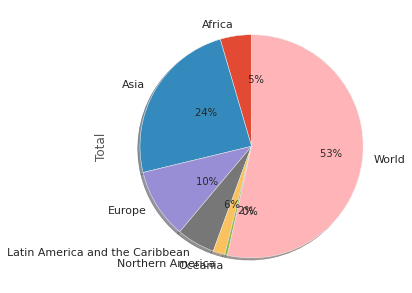

In [32]:
color_list =["gold", "yellowgreen","lightcoral", "lightgreen","pink","red"]
expode_list =[0.1, 0, 0,0, 0.2, 0.3]
df_continents["Total"].plot(kind = "pie",
                           figsize =(5,6),
                           autopct = "%10.lf%%",
                           startangle = 90,
                           shadow = True
                           )